Saving image1.jpg to image1 (3).jpg


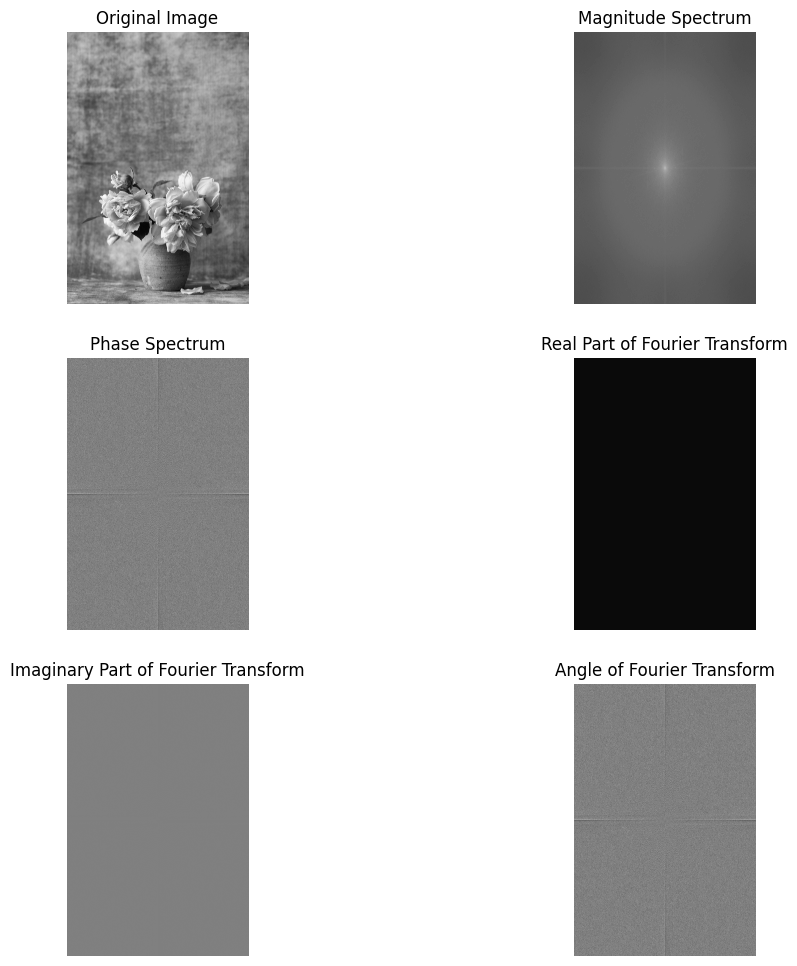

In [1]:
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

def visualize_frequency_components(image_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply 2D Fourier Transform
    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Calculate magnitude spectrum
    magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)

    # Calculate phase spectrum
    phase_spectrum = np.angle(f_transform_shifted)

    # Display the original image and frequency components using matplotlib
    plt.figure(figsize=(12, 12))

    plt.subplot(3, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(3, 2, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum')
    plt.axis('off')

    plt.subplot(3, 2, 3)
    plt.imshow(phase_spectrum, cmap='gray')
    plt.title('Phase Spectrum')
    plt.axis('off')

    plt.subplot(3, 2, 4)
    plt.imshow(np.real(f_transform_shifted), cmap='gray')
    plt.title('Real Part of Fourier Transform')
    plt.axis('off')

    plt.subplot(3, 2, 5)
    plt.imshow(np.imag(f_transform_shifted), cmap='gray')
    plt.title('Imaginary Part of Fourier Transform')
    plt.axis('off')

    plt.subplot(3, 2, 6)
    plt.imshow(np.angle(f_transform_shifted), cmap='gray')
    plt.title('Angle of Fourier Transform')
    plt.axis('off')

    plt.show()

# Upload an image to Google Colab
uploaded = files.upload()

# Get the path of the uploaded image
image_path = list(uploaded.keys())[0]

# Visualize frequency components
visualize_frequency_components(image_path)


Saving image1.jpg to image1 (4).jpg


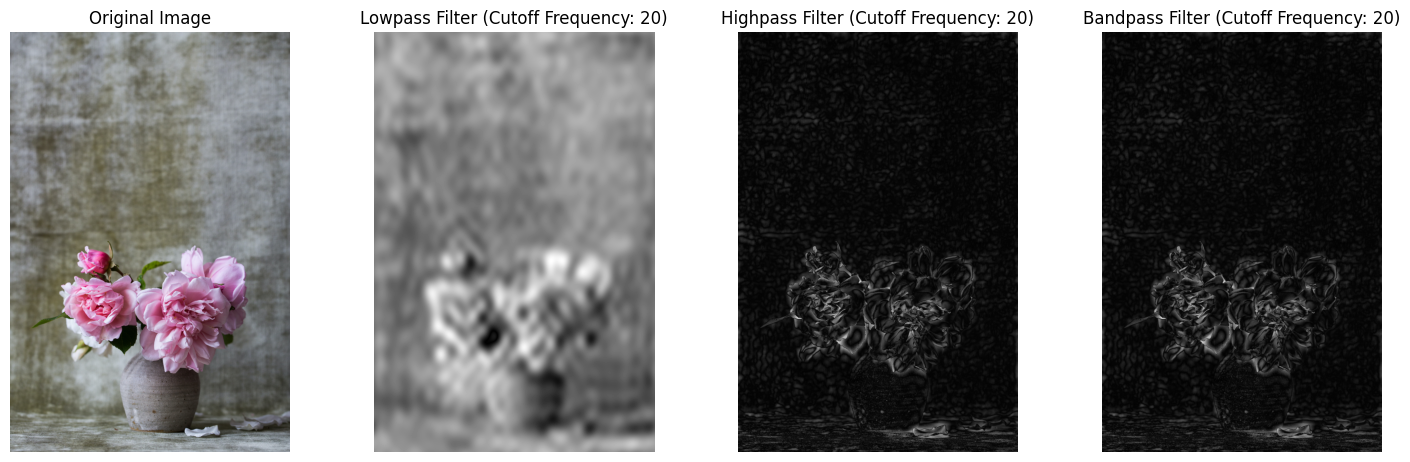

In [2]:
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

def apply_frequency_filter(image, filter_type='lowpass', cutoff_frequency=20):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply 2D Fourier Transform
    f_transform = np.fft.fft2(gray_image)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Get image dimensions
    rows, cols = gray_image.shape
    crow, ccol = rows // 2, cols // 2

    # Create a filter mask
    mask = np.zeros((rows, cols), np.uint8)

    if filter_type == 'lowpass':
        mask[crow-cutoff_frequency:crow+cutoff_frequency, ccol-cutoff_frequency:ccol+cutoff_frequency] = 1

    elif filter_type == 'highpass':
        mask[:crow-cutoff_frequency, :] = 1
        mask[crow+cutoff_frequency:, :] = 1
        mask[:, :ccol-cutoff_frequency] = 1
        mask[:, ccol+cutoff_frequency:] = 1

    elif filter_type == 'bandpass':
        mask[crow-cutoff_frequency:crow+cutoff_frequency, ccol-cutoff_frequency:ccol+cutoff_frequency] = 1
        mask = 1 - mask

    # Apply the filter to the frequency domain
    f_transform_shifted_filtered = f_transform_shifted * mask

    # Inverse Fourier Transform
    img_back = np.fft.ifftshift(f_transform_shifted_filtered)
    img_back = np.fft.ifft2(img_back)
    img_back = np.abs(img_back)

    return img_back

def enhance_image_with_all_filters(image_path, cutoff_frequency=20):
    # Read the image
    image = cv2.imread(image_path)

    # List of filter types
    filter_types = ['lowpass', 'highpass', 'bandpass']

    # Display the original and enhanced images using matplotlib
    plt.figure(figsize=(18, 12))

    plt.subplot(2, 4, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    for i, filter_type in enumerate(filter_types, start=2):
        enhanced_image = apply_frequency_filter(image, filter_type, cutoff_frequency)
        plt.subplot(2, 4, i)
        plt.imshow(enhanced_image, cmap='gray')
        plt.title(f'{filter_type.capitalize()} Filter (Cutoff Frequency: {cutoff_frequency})')
        plt.axis('off')

    plt.show()

# Upload an image to Google Colab
uploaded = files.upload()

# Get the path of the uploaded image
image_path = list(uploaded.keys())[0]

# Set the cutoff frequency
cutoff_frequency = 20

# Call the image enhancement function
enhance_image_with_all_filters(image_path, cutoff_frequency)

Saving image1.jpg to image1 (5).jpg


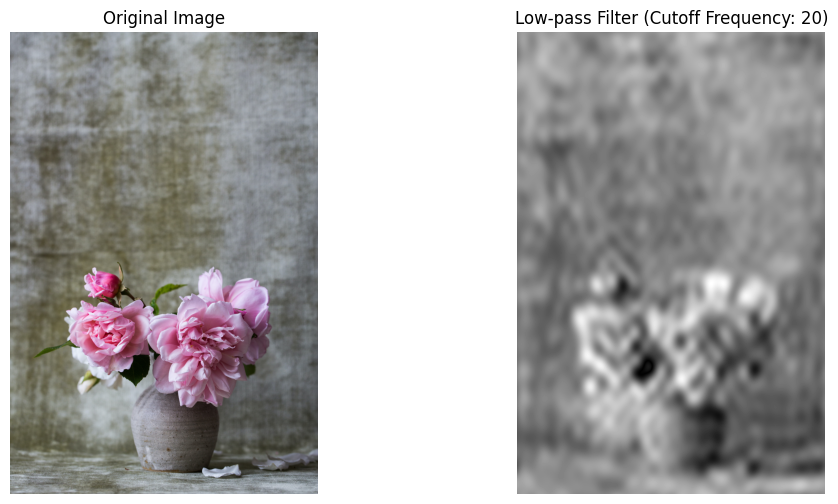

In [3]:
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

def apply_lowpass_filter(image, cutoff_frequency=20):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply 2D Fourier Transform
    f_transform = np.fft.fft2(gray_image)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Get image dimensions
    rows, cols = gray_image.shape
    crow, ccol = rows // 2, cols // 2

    # Create a low-pass circular mask
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow-cutoff_frequency:crow+cutoff_frequency, ccol-cutoff_frequency:ccol+cutoff_frequency] = 1

    # Apply the mask to the frequency domain
    f_transform_shifted_filtered = f_transform_shifted * mask

    # Inverse Fourier Transform
    img_back = np.fft.ifftshift(f_transform_shifted_filtered)
    img_back = np.fft.ifft2(img_back)
    img_back = np.abs(img_back)

    return img_back

def visualize_lowpass_filter(image_path, cutoff_frequency=20):
    # Read the image
    image = cv2.imread(image_path)

    # Apply low-pass filter
    filtered_image = apply_lowpass_filter(image, cutoff_frequency)

    # Display the original and filtered images using matplotlib
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Low-pass Filter (Cutoff Frequency: {cutoff_frequency})')
    plt.axis('off')

    plt.show()

# Upload an image to Google Colab
uploaded = files.upload()

# Get the path of the uploaded image
image_path = list(uploaded.keys())[0]

# Set the cutoff frequency
cutoff_frequency = 20

# Call the visualization function
visualize_lowpass_filter(image_path, cutoff_frequency)

Saving image1.jpg to image1 (6).jpg


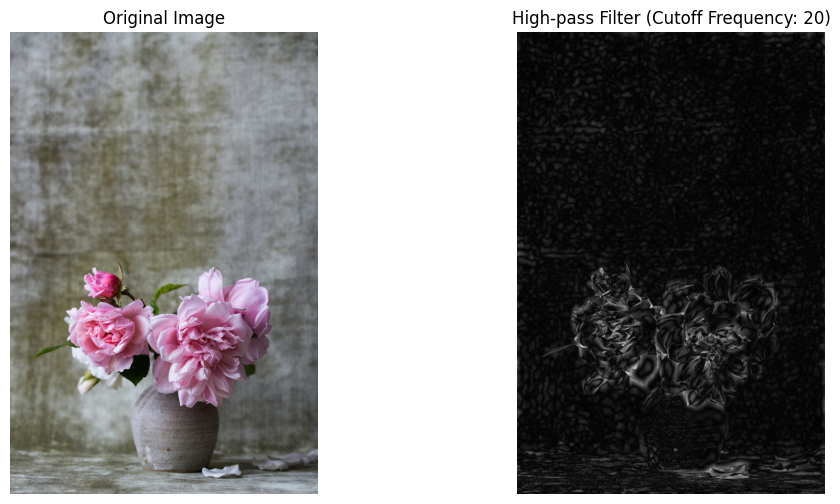

In [4]:
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

def apply_highpass_filter(image, cutoff_frequency=20):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply 2D Fourier Transform
    f_transform = np.fft.fft2(gray_image)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Get image dimensions
    rows, cols = gray_image.shape
    crow, ccol = rows // 2, cols // 2

    # Create a high-pass circular mask
    mask = np.ones((rows, cols), np.uint8)
    mask[crow-cutoff_frequency:crow+cutoff_frequency, ccol-cutoff_frequency:ccol+cutoff_frequency] = 0

    # Apply the mask to the frequency domain
    f_transform_shifted_filtered = f_transform_shifted * mask

    # Inverse Fourier Transform
    img_back = np.fft.ifftshift(f_transform_shifted_filtered)
    img_back = np.fft.ifft2(img_back)
    img_back = np.abs(img_back)

    return img_back

def visualize_highpass_filter(image_path, cutoff_frequency=20):
    # Read the image
    image = cv2.imread(image_path)

    # Apply high-pass filter
    filtered_image = apply_highpass_filter(image, cutoff_frequency)

    # Display the original and filtered images using matplotlib
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'High-pass Filter (Cutoff Frequency: {cutoff_frequency})')
    plt.axis('off')

    plt.show()

# Upload an image to Google Colab
uploaded = files.upload()

# Get the path of the uploaded image
image_path = list(uploaded.keys())[0]

# Set the cutoff frequency
cutoff_frequency = 20

# Call the visualization function
visualize_highpass_filter(image_path, cutoff_frequency)

Saving image1.jpg to image1 (7).jpg


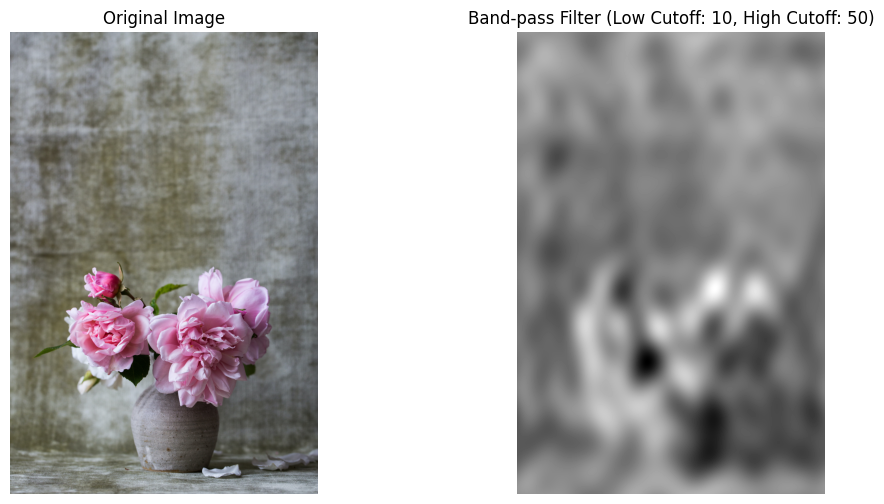

In [5]:
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

def apply_bandpass_filter(image, low_cutoff=10, high_cutoff=50):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply 2D Fourier Transform
    f_transform = np.fft.fft2(gray_image)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Get image dimensions
    rows, cols = gray_image.shape
    crow, ccol = rows // 2, cols // 2

    # Create a low-pass circular mask
    lowpass_mask = np.zeros((rows, cols), np.uint8)
    lowpass_mask[crow-low_cutoff:crow+low_cutoff, ccol-low_cutoff:ccol+low_cutoff] = 1

    # Create a high-pass circular mask
    highpass_mask = np.ones((rows, cols), np.uint8)
    highpass_mask[crow-high_cutoff:crow+high_cutoff, ccol-high_cutoff:ccol+high_cutoff] = 1

    # Combine the low-pass and high-pass masks for band-pass
    bandpass_mask = lowpass_mask * highpass_mask

    # Apply the band-pass mask to the frequency domain
    f_transform_shifted_filtered = f_transform_shifted * bandpass_mask

    # Inverse Fourier Transform
    img_back = np.fft.ifftshift(f_transform_shifted_filtered)
    img_back = np.fft.ifft2(img_back)
    img_back = np.abs(img_back)

    return img_back

def visualize_bandpass_filter(image_path, low_cutoff=10, high_cutoff=50):
    # Read the image
    image = cv2.imread(image_path)

    # Apply band-pass filter
    filtered_image = apply_bandpass_filter(image, low_cutoff, high_cutoff)

    # Display the original and filtered images using matplotlib
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Band-pass Filter (Low Cutoff: {low_cutoff}, High Cutoff: {high_cutoff})')
    plt.axis('off')

    plt.show()

# Upload an image to Google Colab
uploaded = files.upload()

# Get the path of the uploaded image
image_path = list(uploaded.keys())[0]

# Set the cutoff frequencies
low_cutoff = 10
high_cutoff = 50

# Call the visualization function
visualize_bandpass_filter(image_path, low_cutoff, high_cutoff)

Saving image1.jpg to image1 (8).jpg


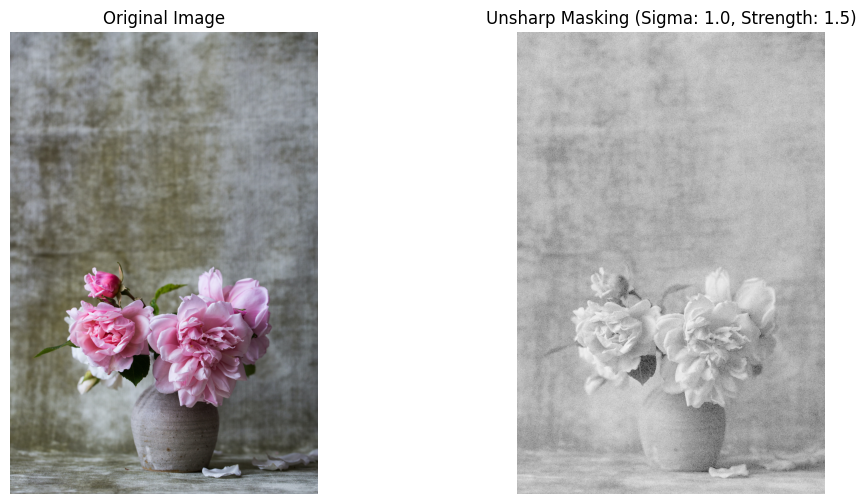

In [6]:
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

def apply_unsharp_mask(image, sigma=1.0, strength=1.5):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to the image
    blurred = cv2.GaussianBlur(gray_image, (0, 0), sigma)

    # Calculate the unsharp mask
    unsharp_mask = gray_image - blurred

    # Enhance the image by adding the unsharp mask multiplied by a strength factor
    enhanced_image = gray_image + strength * unsharp_mask

    # Clip values to the valid range [0, 255]
    enhanced_image = np.clip(enhanced_image, 0, 255)

    return enhanced_image

def visualize_unsharp_mask(image_path, sigma=1.0, strength=1.5):
    # Read the image
    image = cv2.imread(image_path)

    # Apply Unsharp Masking
    enhanced_image = apply_unsharp_mask(image, sigma, strength)

    # Display the original and enhanced images using matplotlib
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(enhanced_image, cmap='gray')
    plt.title(f'Unsharp Masking (Sigma: {sigma}, Strength: {strength})')
    plt.axis('off')

    plt.show()

# Upload an image to Google Colab
uploaded = files.upload()

# Get the path of the uploaded image
image_path = list(uploaded.keys())[0]

# Set parameters for Unsharp Masking
sigma = 1.0
strength = 1.5

# Visualize Unsharp Masking enhancement
visualize_unsharp_mask(image_path, sigma, strength)

Saving image1.jpg to image1 (9).jpg


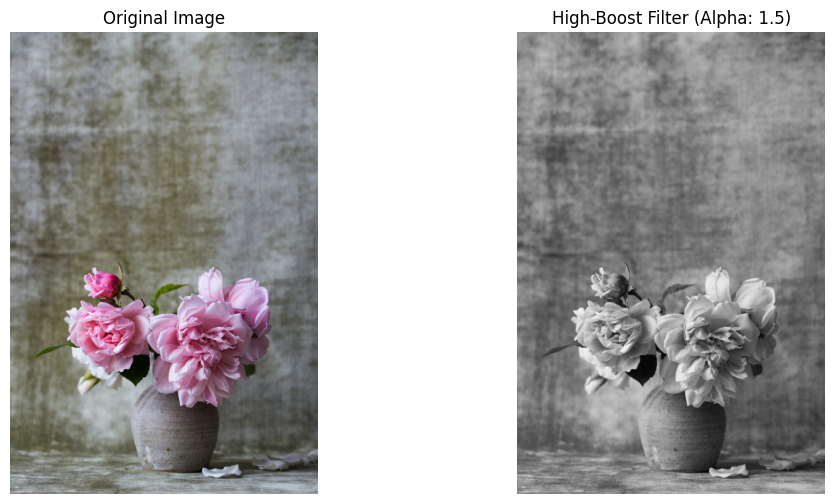

In [7]:
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

def apply_high_boost_filter(image, alpha=1.5):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Laplacian filter to obtain the high-frequency components
    laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)

    # Enhance the image by adding the high-frequency components multiplied by alpha
    enhanced_image = gray_image + alpha * laplacian

    # Clip values to the valid range [0, 255]
    enhanced_image = np.clip(enhanced_image, 0, 255)

    return enhanced_image

def visualize_high_boost_filter(image_path, alpha=1.5):
    # Read the image
    image = cv2.imread(image_path)

    # Apply High-Boost Filtering
    enhanced_image = apply_high_boost_filter(image, alpha)

    # Display the original and enhanced images using matplotlib
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(enhanced_image, cmap='gray')
    plt.title(f'High-Boost Filter (Alpha: {alpha})')
    plt.axis('off')

    plt.show()

# Upload an image to Google Colab
uploaded = files.upload()

# Get the path of the uploaded image
image_path = list(uploaded.keys())[0]

# Set the alpha parameter for High-Boost Filtering
alpha = 1.5

# Visualize High-Boost Filtering enhancement
visualize_high_boost_filter(image_path, alpha)